In [77]:
import pandas as pd
import geopandas as gpd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import oapackage
import matplotlib.colors as mcolor

from adjustText import adjust_text
from AgPViz import agpvVisualizer

sns.set_style('darkgrid')

data_dir = 'AgPV_data'
export_dir = 'Export_data'
graph_dir = 'AgPV_Graphs'

### Tutorial
agpvVisualizer is a custom wrapper housing equity index data in a pandas dataframe and providing some methods to make bar charts/scatterplots. It also contains a list of counties in tribal borders.

Here's some useful commands for the dataframe

In [83]:
# access just the data portion
demo_df = agpvVisualizer().df

# display the first 5 rows of data
print('First 5 Rows')
display(demo_df.head())

# statistical summary
print('Statistical Summary')
display(demo_df.describe())

# print column names. This is helpful to remember what the column anmes are to input the visualizaiton methods.
print('columns')
display(demo_df.columns)

First 5 Rows


FIPS   county    state  capacity_mw_dc  Solar_supply_per_land_area  \
0  01001  Autauga  Alabama    29947.935193                34181.380730   
1  01003  Baldwin  Alabama    62911.632997                27201.414072   
2  01005  Barbour  Alabama    58081.848135                44683.161784   
3  01007     Bibb  Alabama    38014.050777                40077.253060   
4  01009   Blount  Alabama    24767.738851                24999.826647   

   generation_potential_ac  generation_potential_dc   ALAND_SQKM  RESL_SCORE  \
0             5.262676e+07             5.262677e+07  1539.632505   51.810001   
1             1.120095e+08             1.120096e+08  4117.783661   86.120003   
2             1.024210e+08             1.024211e+08  2292.161870    6.240000   
3             6.461219e+07             6.461220e+07  1612.191075   19.730000   
4             4.175624e+07             4.175625e+07  1670.261241   22.820000   

   SOVI_SCORE  ...  tonne_co2_per_person  SolarPanelLandUse  \
0   51.299999  ...             21.539853               0.05   
1   31.030001  ...             21.539853               0.05   
2   99.269997  ...             21.539853               0.05   
3   80.779999  ...             21.539853               0.05   
4   51.369999  ...             21.539853               0.05   

   ag_worker_heat_days  Ag_compatibility_exists  eala_sum_positive  \
0                483.0                     True       21551.518712   
1               7689.5                     True      444297.843564   
2                749.0                     True      197370.186504   
3                  0.0                     True        5076.115567   
4                360.0                     True       32552.242402   

        eala_net  EW_AgPV_cobenefits_score  Theme_Weighting_Score  \
0   20828.748821                  0.776109               0.752235   
1  443676.897072                  0.720412               0.798956   
2  196296.181220                  0.805832               0.778837   
3    4751.245599                  0.527113               0.564041   
4   10964.282012                  0.525702               0.542273   

      County, State  Theme_Weighting_Score_percentile  
0  Autauga, Alabama                          0.883450  
1  Baldwin, Alabama                          0.942058  
2  Barbour, Alabama                          0.916084  
3     Bibb, Alabama                          0.392274  
4   Blount, Alabama                          0.311022  

[5 rows x 47 columns]

Statistical Summary


capacity_mw_dc  Solar_supply_per_land_area  generation_potential_ac  \
count    3.074000e+03                 3074.000000             3.074000e+03   
mean     3.652640e+04                22832.557003             6.752368e+07   
std      6.716125e+04                15483.792562             1.387462e+08   
min      4.263192e+00                    3.261496             8.303925e+03   
25%      8.697035e+03                11031.931014             1.421679e+07   
50%      1.800704e+04                19483.159994             3.024810e+07   
75%      3.618026e+04                31774.060877             6.269970e+07   
max      1.204191e+06                90999.303371             2.637967e+09   

       generation_potential_dc    ALAND_SQKM   RESL_SCORE   SOVI_SCORE  \
count             3.074000e+03   3074.000000  3143.000000  3221.000000   
mean              6.752369e+07   2485.729479    50.000032    50.876768   
std               1.387462e+08   3387.757350    28.881291    29.092930   
min               8.303927e+03     19.365355     0.000000     0.000000   
25%               1.421680e+07   1120.648528    25.000000    25.620001   
50%               3.024810e+07   1596.519046    50.000000    51.240002   
75%               6.269971e+07   2378.179970    75.000000    76.580002   
max               2.637967e+09  51976.351848   100.000000   100.000000   

         TRND_ALRA      TRND_EALA    SWND_ALRA  ...  \
count  3224.000000    3224.000000  3224.000000  ...   
mean      0.000027    3349.215879     0.000165  ...   
std       0.000044    7152.001044     0.000373  ...   
min       0.000000       0.000000     0.000000  ...   
25%       0.000009     253.416733     0.000002  ...   
50%       0.000021    1271.288393     0.000023  ...   
75%       0.000034    3821.361091     0.000158  ...   
max       0.001136  231272.925320     0.003632  ...   

       Percent Non-white Cropland   Pastureland  tonne_co2_per_person  \
count                 3235.000000  3.235000e+03           3068.000000   
mean                    11.206491  1.148993e+05             19.521023   
std                     26.186253  3.033121e+05             12.189912   
min                      0.000000  0.000000e+00              8.203252   
25%                      0.000000  3.988500e+03             11.431693   
50%                      0.000000  1.545900e+04             17.186100   
75%                      0.000000  7.928650e+04             22.078080   
max                    100.000000  5.359071e+06             96.596210   

       SolarPanelLandUse  ag_worker_heat_days  eala_sum_positive  \
count        3142.000000          3235.000000       3.235000e+03   
mean            0.324300          1948.174086       5.941587e+05   
std             0.630635          8358.430294       5.324318e+06   
min             0.050000             0.000000       0.000000e+00   
25%             0.050000             0.000000       7.355511e+03   
50%             0.050000           393.000000       4.918661e+04   
75%             0.300000          1244.625000       2.331796e+05   
max             6.000000        192182.250000       2.150561e+08   

           eala_net  EW_AgPV_cobenefits_score  Theme_Weighting_Score  \
count  3.235000e+03               3003.000000            3003.000000   
mean   5.908209e+05                  0.581183               0.600018   
std    5.324167e+06                  0.127188               0.122840   
min   -2.589389e+04                  0.000000               0.000000   
25%    5.317524e+03                  0.498846               0.517611   
50%    4.596411e+04                  0.566052               0.592525   
75%    2.289361e+05                  0.650784               0.682319   
max    2.150547e+08                  1.000000               1.000000   

       Theme_Weighting_Score_percentile  
count                       3003.000000  
mean                           0.500167  
std                            0.288723  
min                            0.000333  
25%        

columns


Index(['FIPS', 'county', 'state', 'capacity_mw_dc',
       'Solar_supply_per_land_area', 'generation_potential_ac',
       'generation_potential_dc', 'ALAND_SQKM', 'RESL_SCORE', 'SOVI_SCORE',
       'TRND_ALRA', 'TRND_EALA', 'SWND_ALRA', 'SWND_EALA', 'HWAV_ALRA',
       'HWAV_EALA', 'HAIL_ALRA', 'HAIL_EALA', 'DRGT_ALRA', 'DRGT_EALA',
       'Energy Burden (% income)', 'Percent Non Investor Owned',
       'Value_veggies', 'Has_undisclosed_cropland', 'Value_berries',
       'Has_undisclosed_berries', 'AgPV_crop_totals',
       'Sheep_goats_total_sales', 'Has_undisclosed_goats_sheep_totals',
       'Percent Woman-owned Sheep Goats Producers',
       'Percent Nonwhite Sheep Goats Producers', 'Avg Farm Net Income ($)',
       'Has_undisclosed_farm_income', 'Percent Woman-owned Cropland',
       'Percent Non-white Cropland', 'Pastureland',
       'Has_undisclosed_pastureland', 'tonne_co2_per_person',
       'SolarPanelLandUse', 'ag_worker_heat_days', 'Ag_compatibility_exists',
       'eala_s

### Visualizations

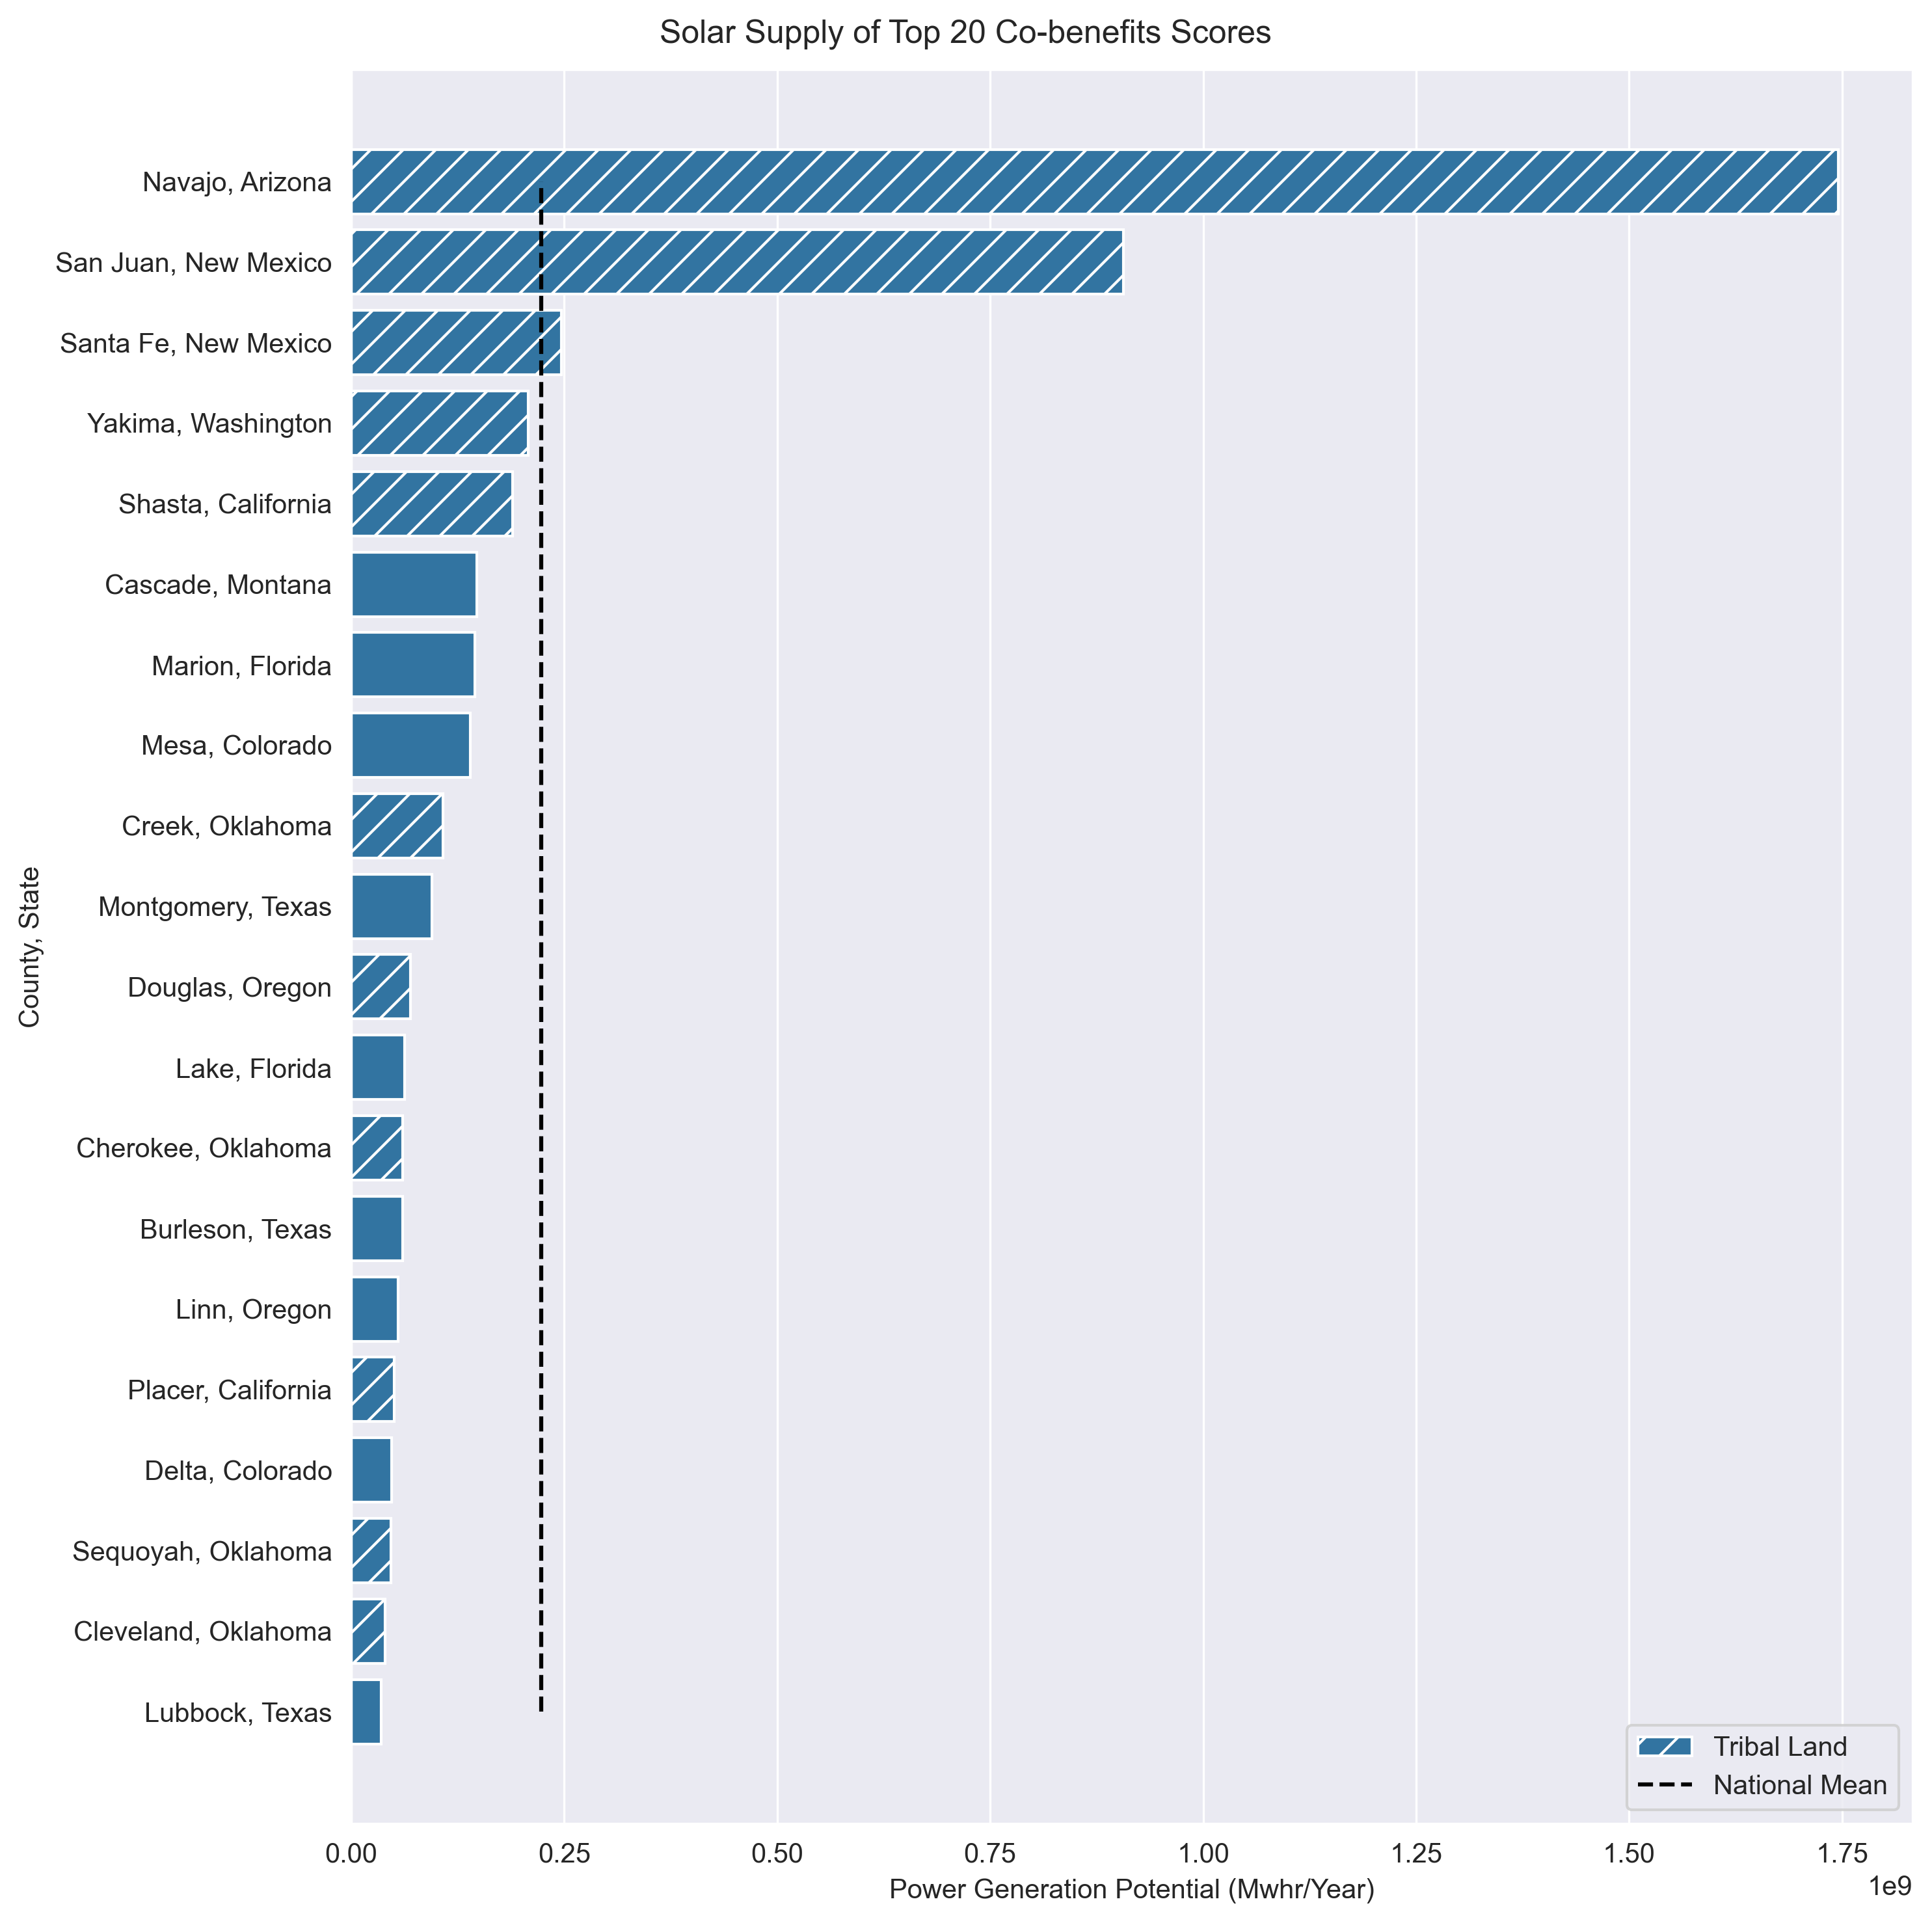

<Axes: xlabel='Power Generation Potential (Mwhr/Year)', ylabel='County, State'>

In [2]:
x_label = 'Power Generation Potential (MWhr/year)'

agpviz = agpvVisualizer()

agpviz.make_bar_chart(x_label)

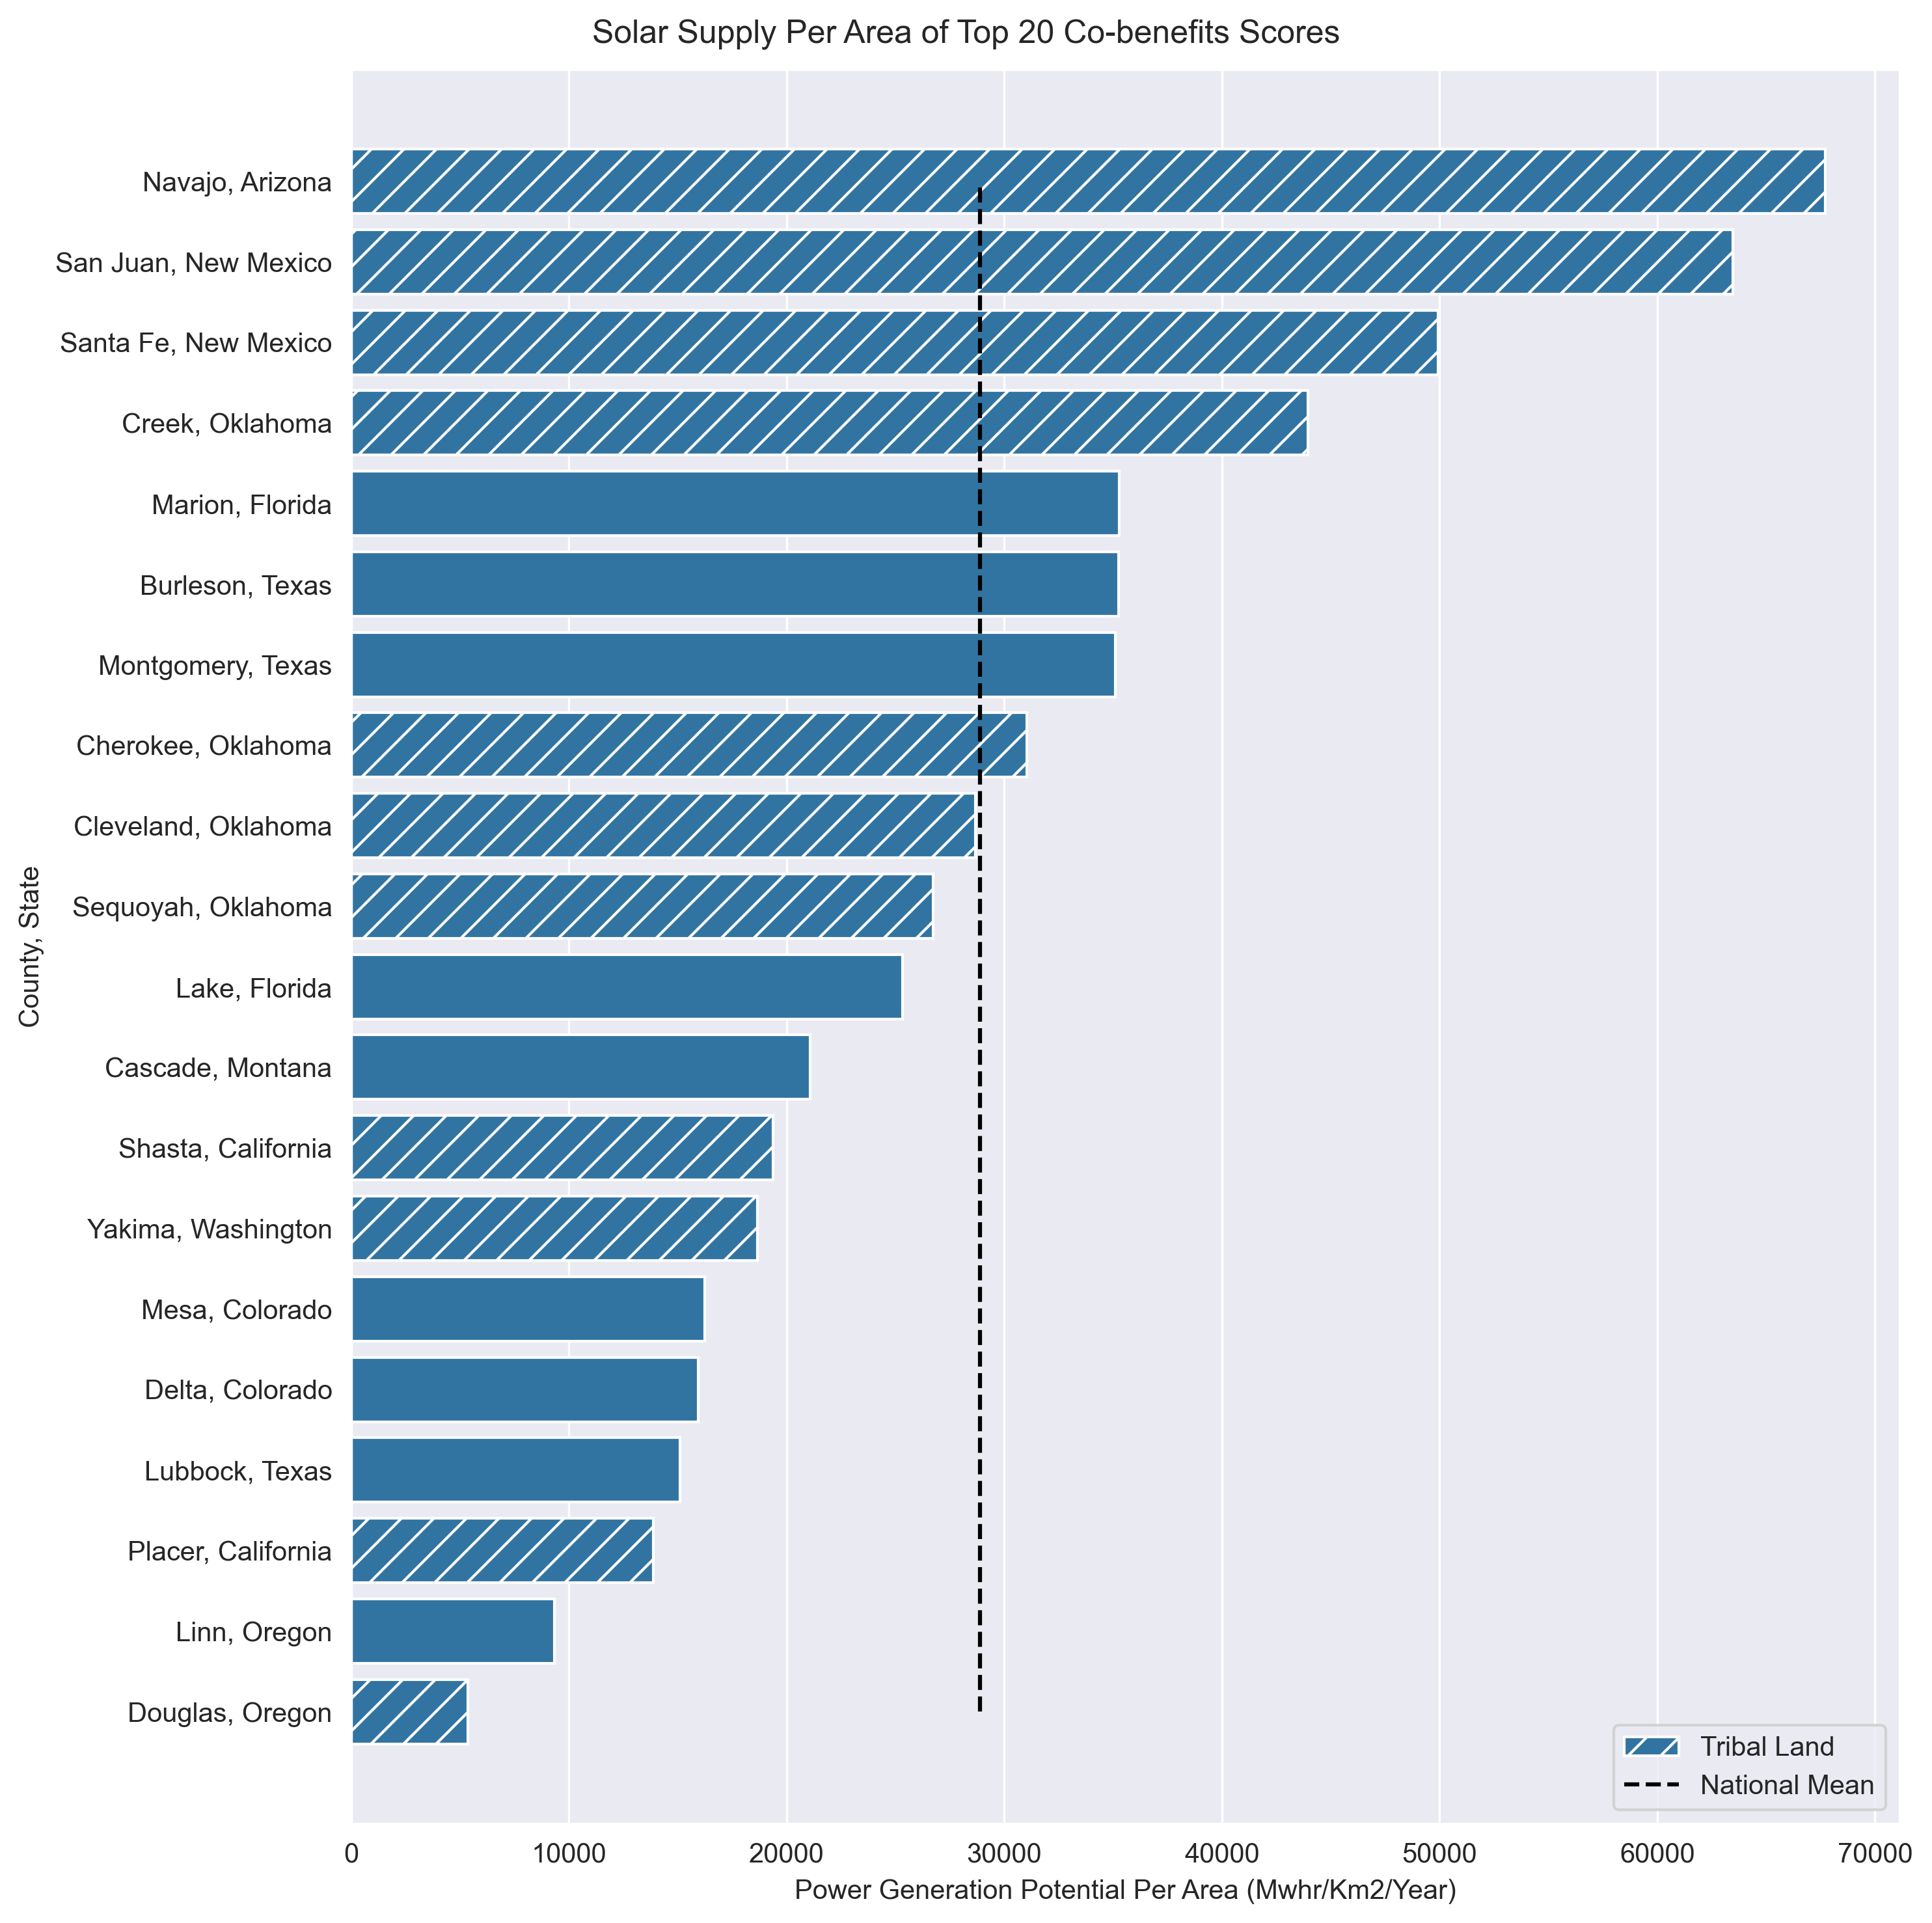

<Axes: xlabel='Power Generation Potential Per Area (Mwhr/Km2/Year)', ylabel='County, State'>

In [3]:
x = 'Solar_supply_per_land_area'
x_label = 'Power Generation Potential Per Area (MWhr/km2/year)'

agpviz.make_bar_chart(x_label, x=x, title_start='Solar Supply Per Area')

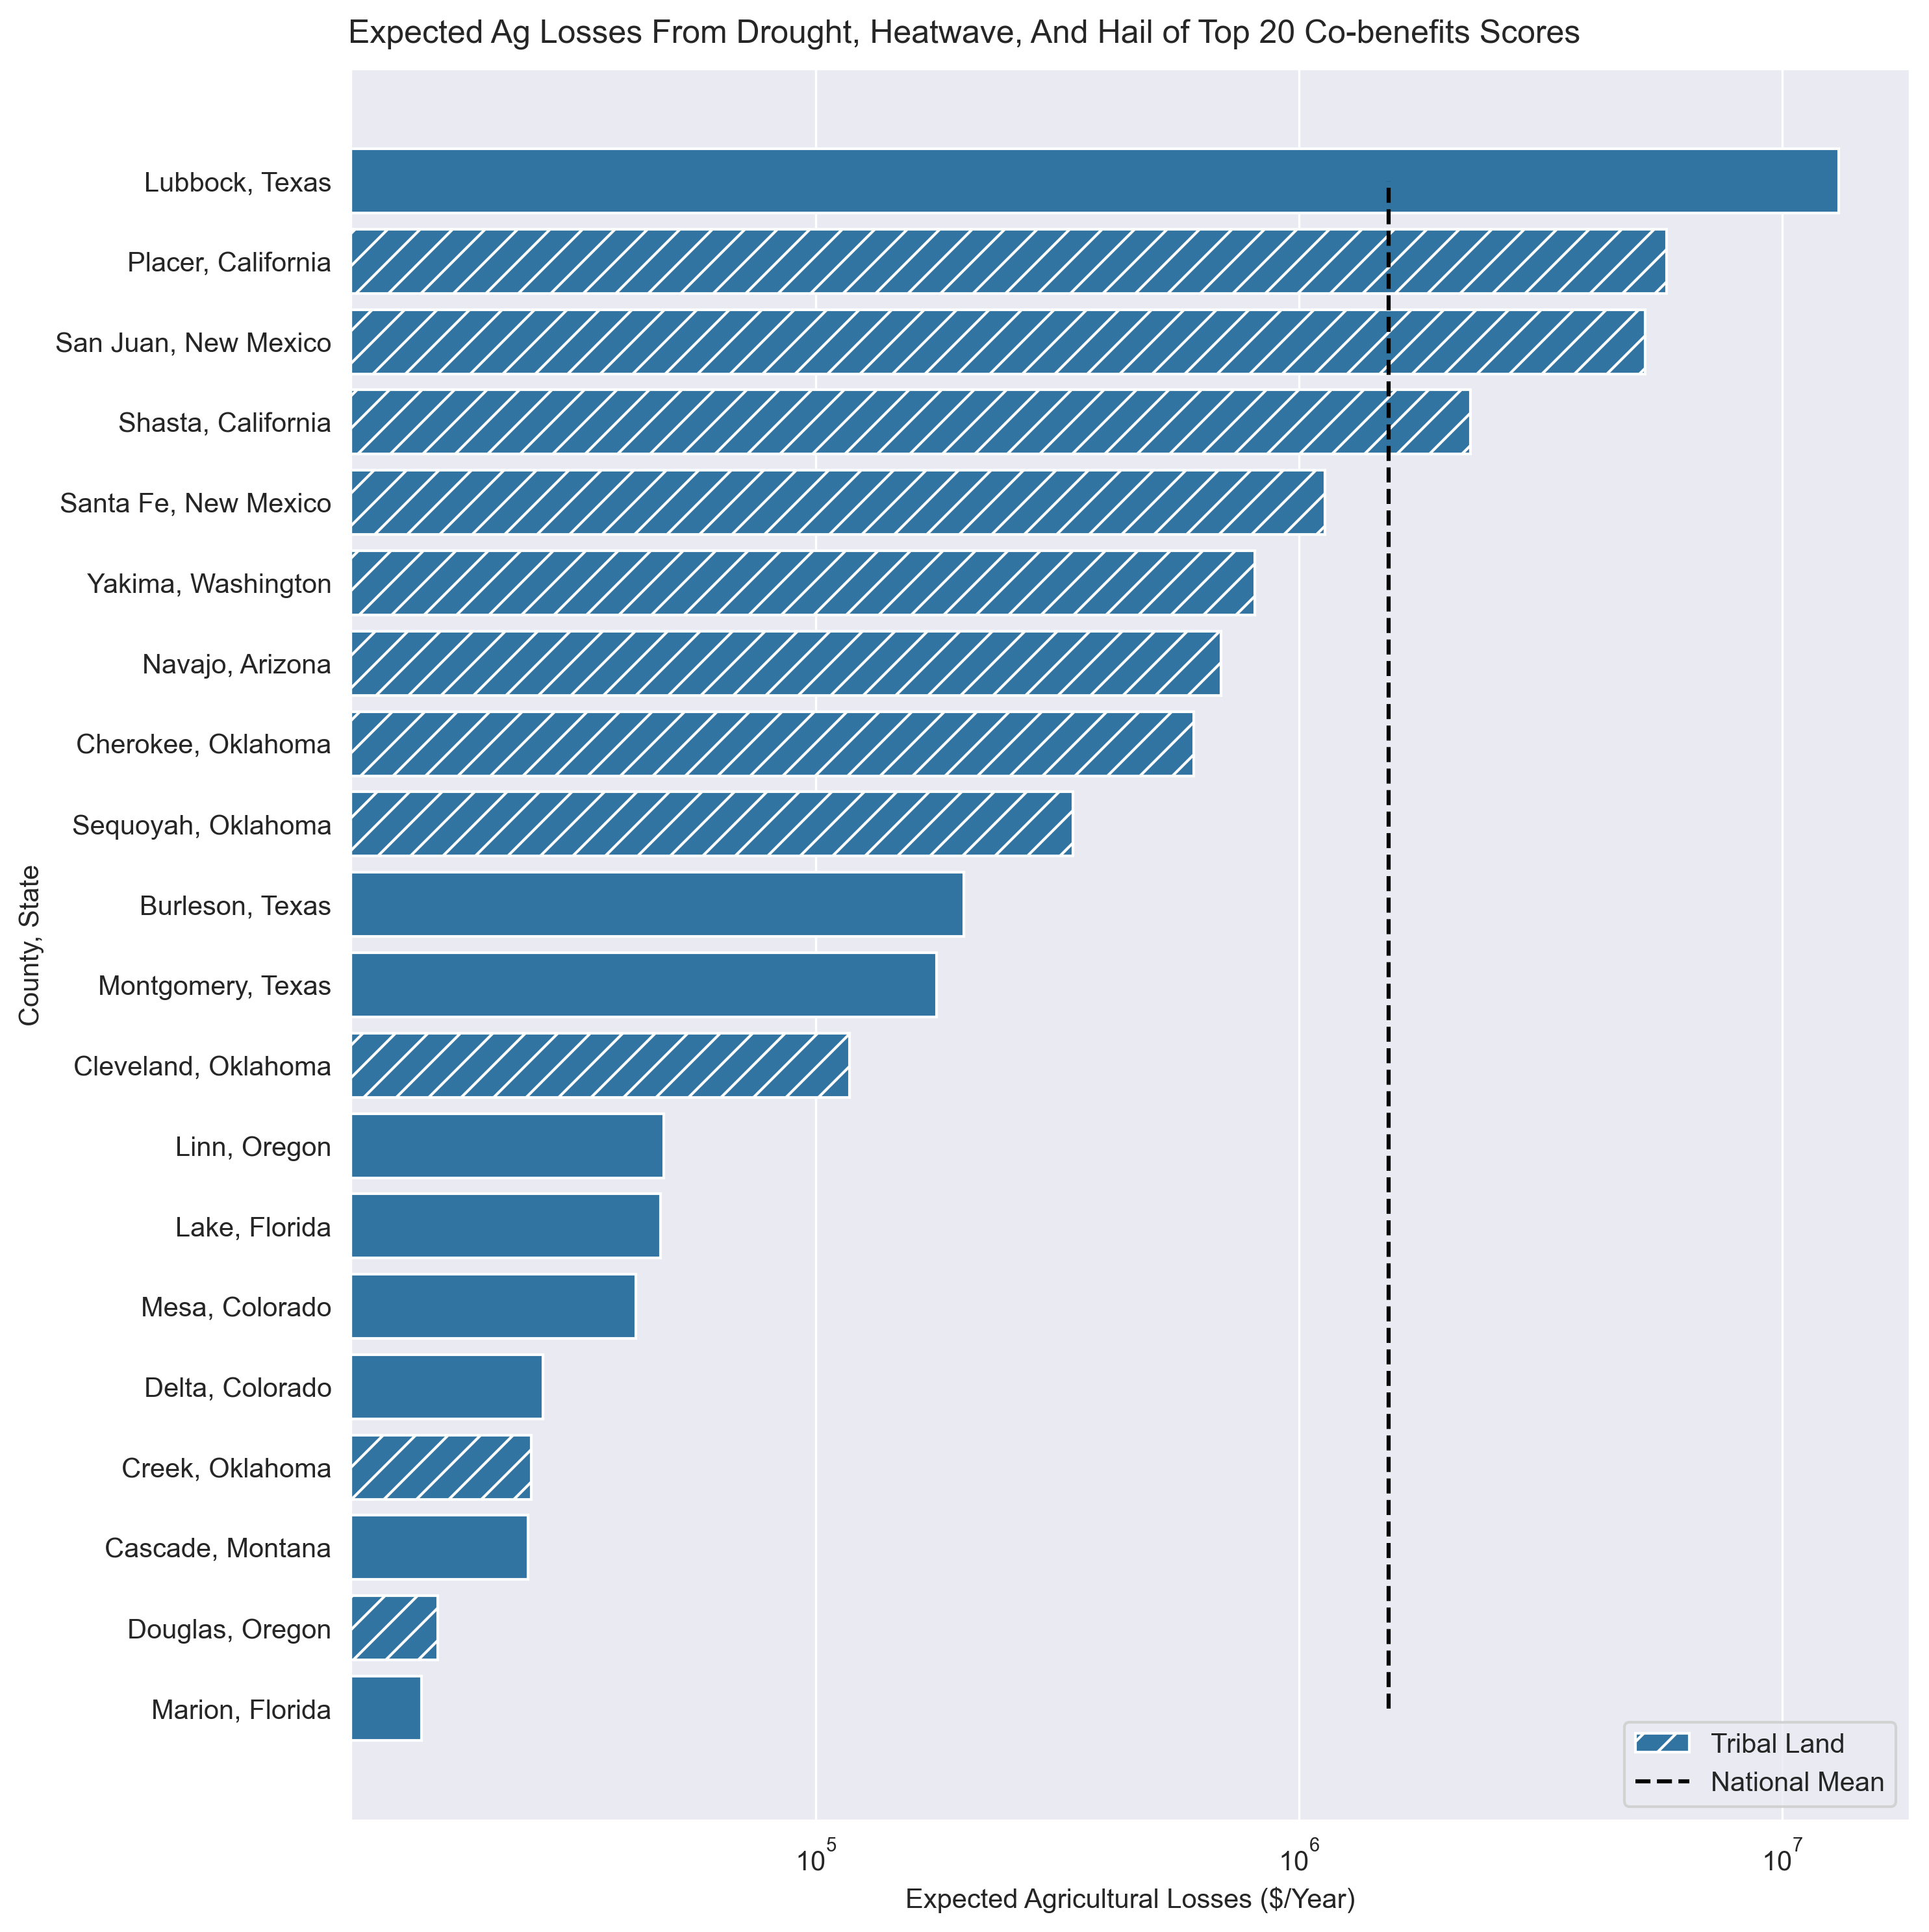

<Axes: xlabel='Expected Agricultural Losses ($/Year)', ylabel='County, State'>

In [4]:
agpviz.make_bar_chart('Expected Agricultural Losses ($/year)', 
                      'Expected Ag Losses from Drought, Heatwave, and Hail', 
                      x='eala_sum_positive',
                     logx=True)

### Scatterplot

Kim's suggestion
4.	Looking at both scatterplots, I think this might be the ideal between all of them: Equity index on Y-Axis (what the ARER journal review said is that readers just look for stuff that’s at the ‘top’ of the graph for clarity), Solar Capacity on X-Axis, AgPV crop totals = size of bubbles, and a yellow color ramp where the darkest yellow indicates the counties that are producing the most solar energy per land area, but the counties highlighted with names are those with the highest equity index for AgPV. So a reader should be able to look at the graph and see which of those ‘named counties’ (which are also in the bar chart) have the darkest yellow with greatest capacity. Again… probably should find some way to identify tribal counties, dunno how though… Let’s see how this looks? 

<Axes: xlabel='generation_potential_ac', ylabel='Theme_Weighting_Score'>

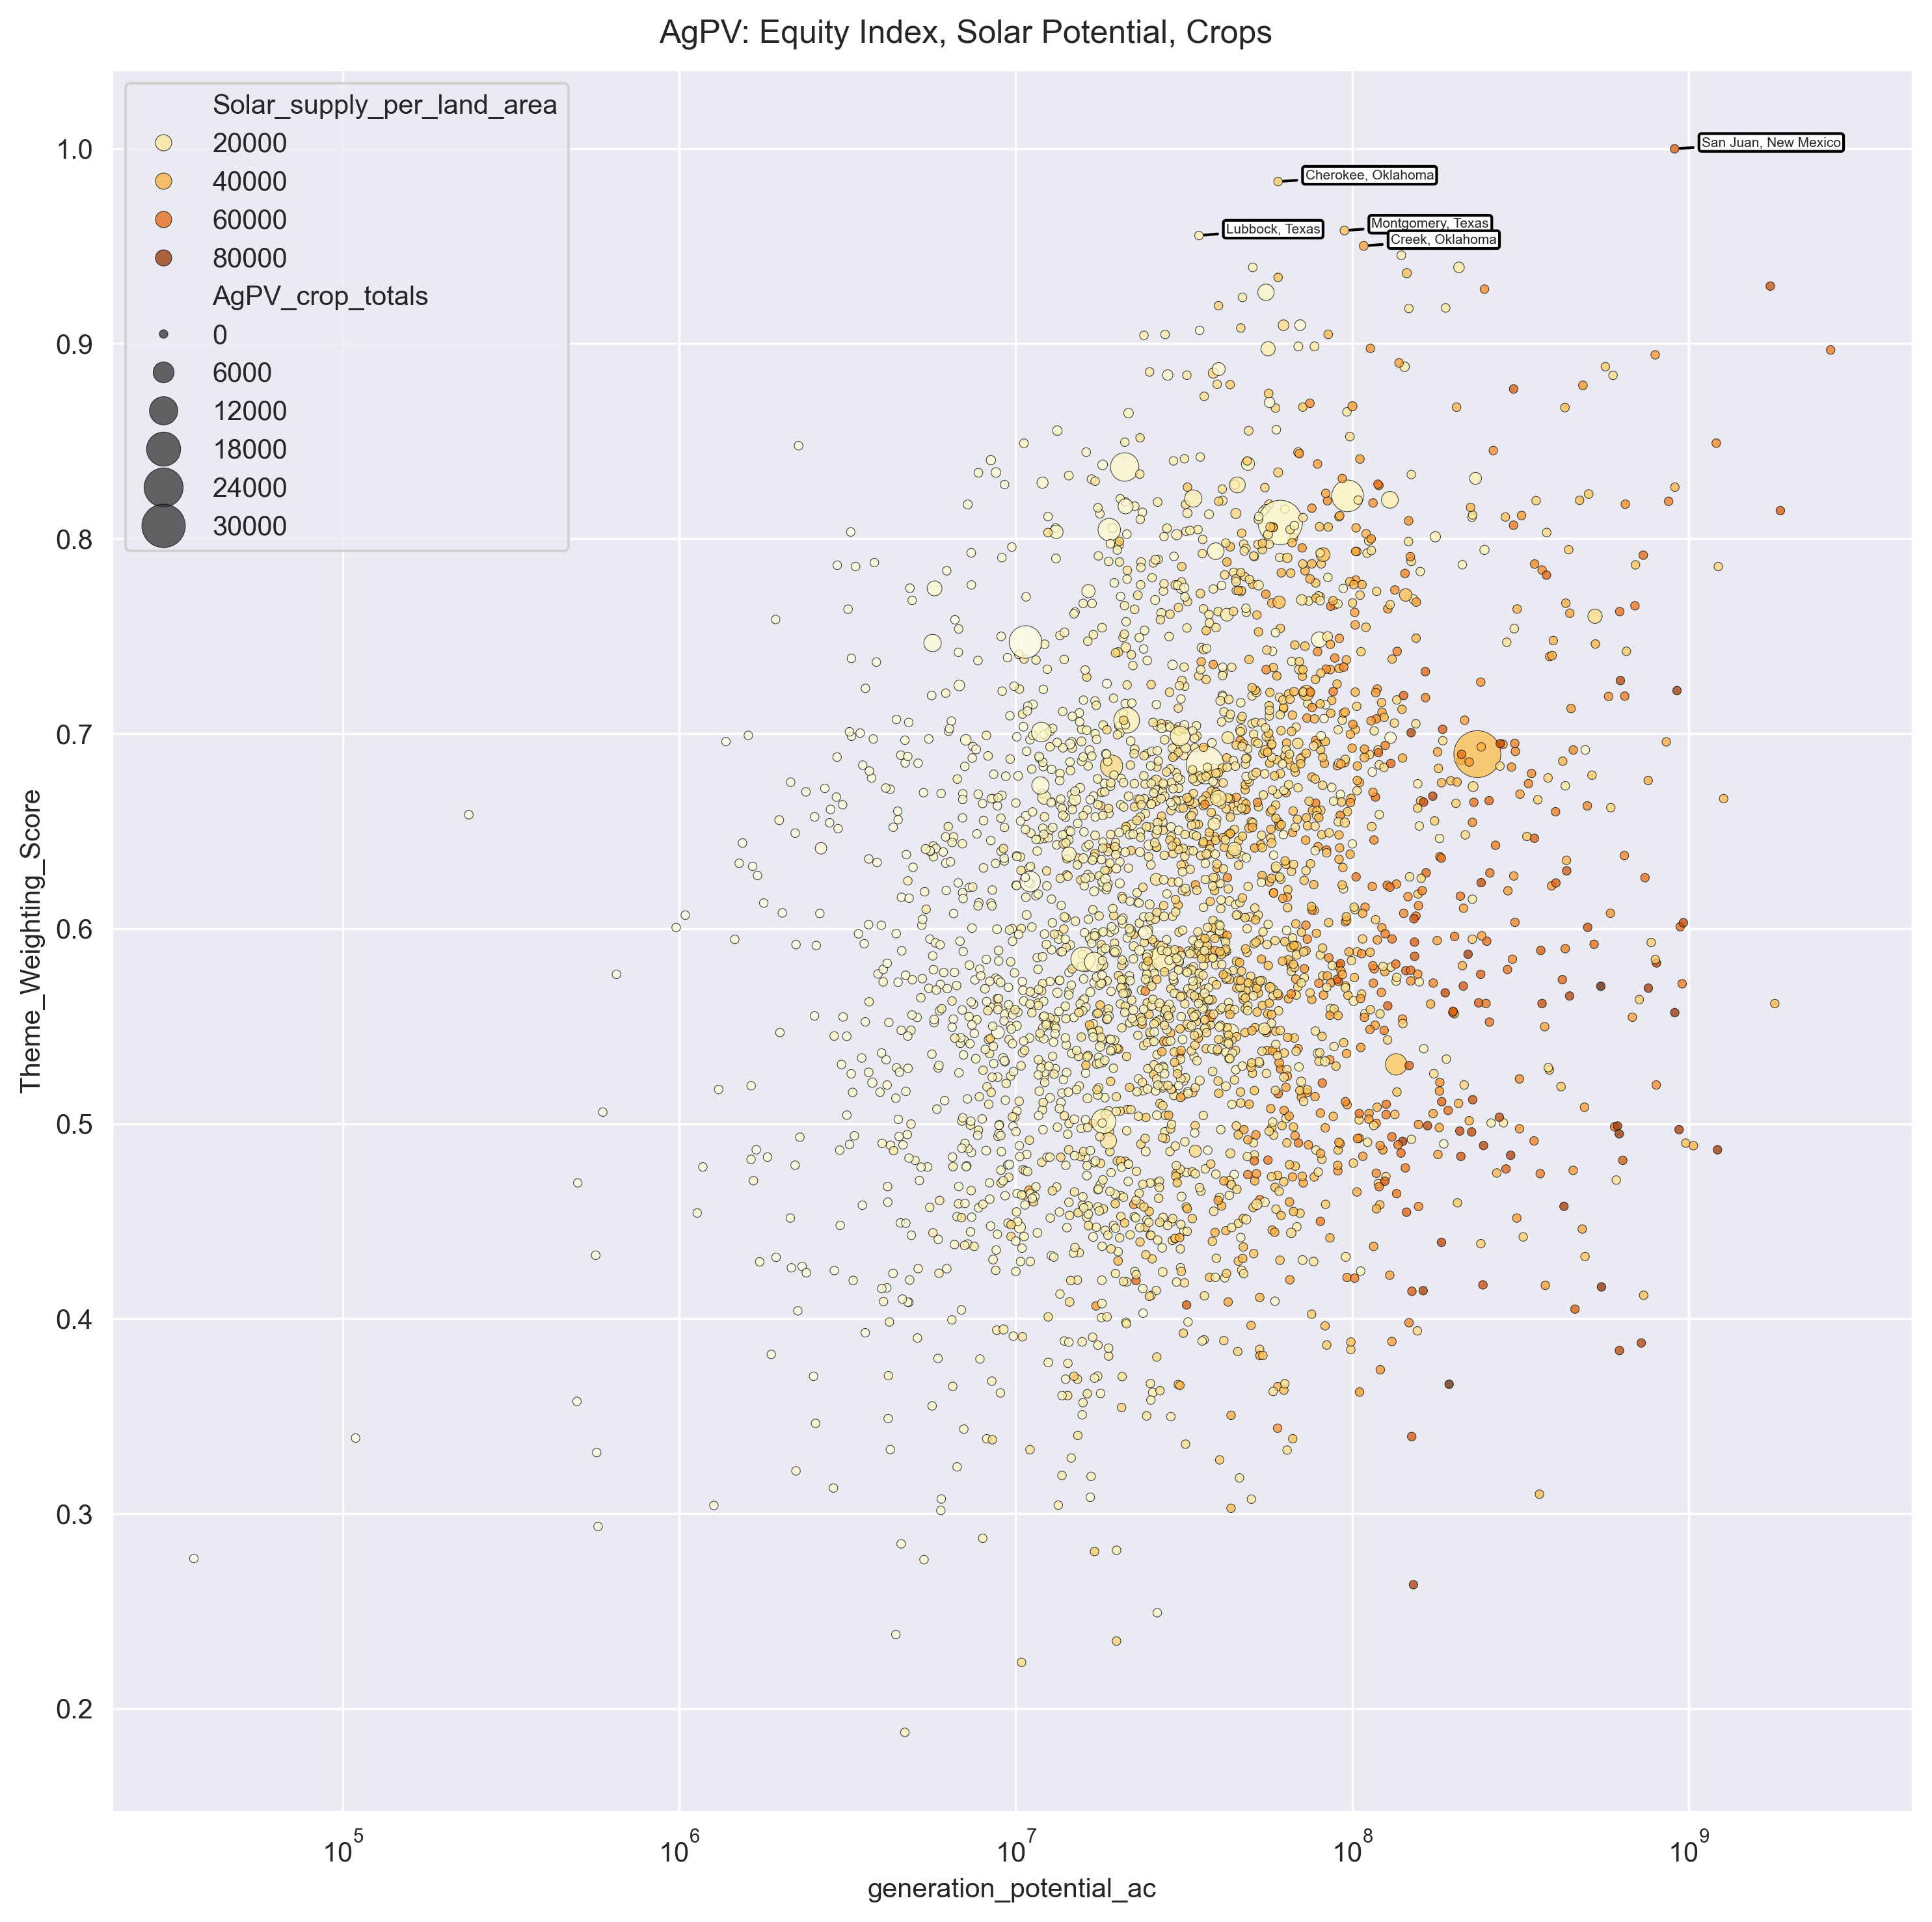

In [5]:
agpviz.make_scatter_plot('AgPV: Equity Index, Solar Potential, Crops', logx=True, annot_kwargs={'xytext':(10, 1), 'textcoords':'offset points'})

Visualisation looks pretty good, but it raises the question why aren't the large bubbles highlighted? Ideally, we'd get big bubbles at the top of the graph

<Axes: xlabel='generation_potential_ac', ylabel='AgPV_crop_totals'>

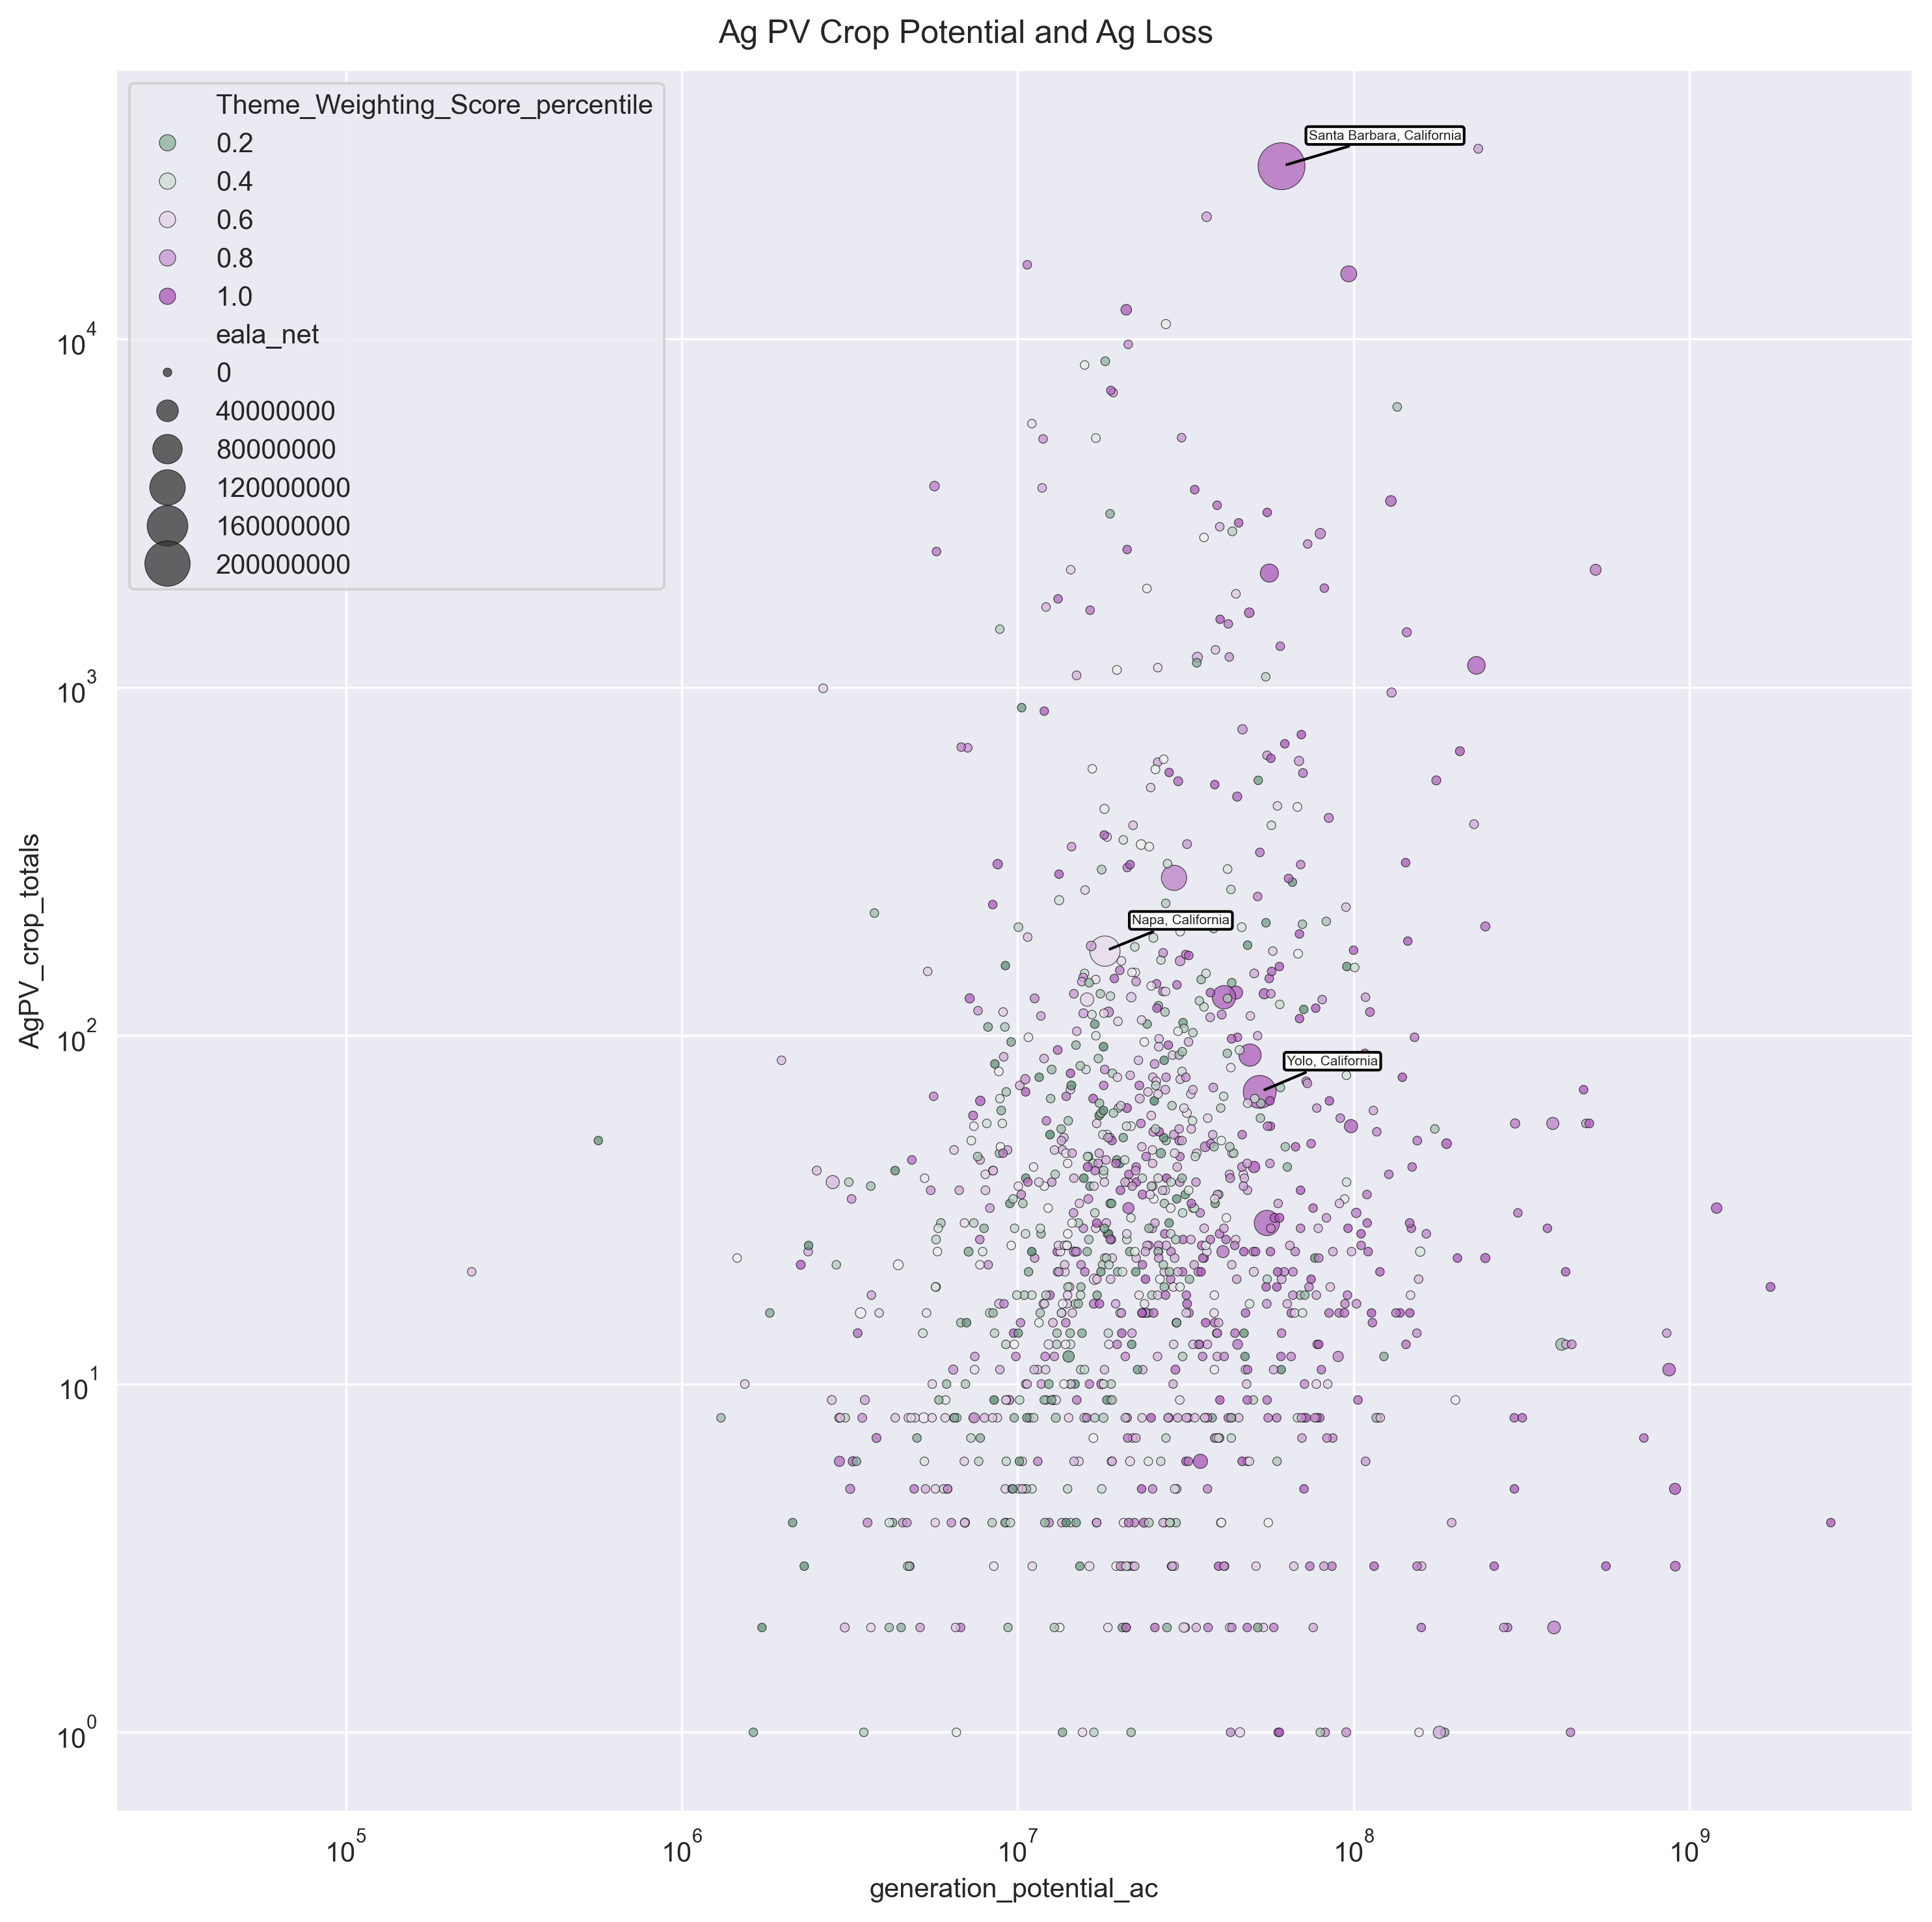

In [6]:
agpviz.calculate_col_percentile('Theme_Weighting_Score')

annot_kwargs={'xytext':(10, 10), 'textcoords':'offset points'}

scatter_params = {'palette': sns.diverging_palette(145, 300, s=60, as_cmap=True),
                 'y': 'AgPV_crop_totals',
                  'size':'eala_net',
                  'annot_col': 'eala_net',
                 'hue': 'Theme_Weighting_Score_percentile',
                 'logx': True,
                 'logy': True,
                 'annot_kwargs': annot_kwargs,
                 'top_n': 5}

agpviz.make_scatter_plot('Ag PV Crop Potential and Ag Loss', **scatter_params)

<Axes: xlabel='generation_potential_ac', ylabel='Sheep_goats_total_sales'>

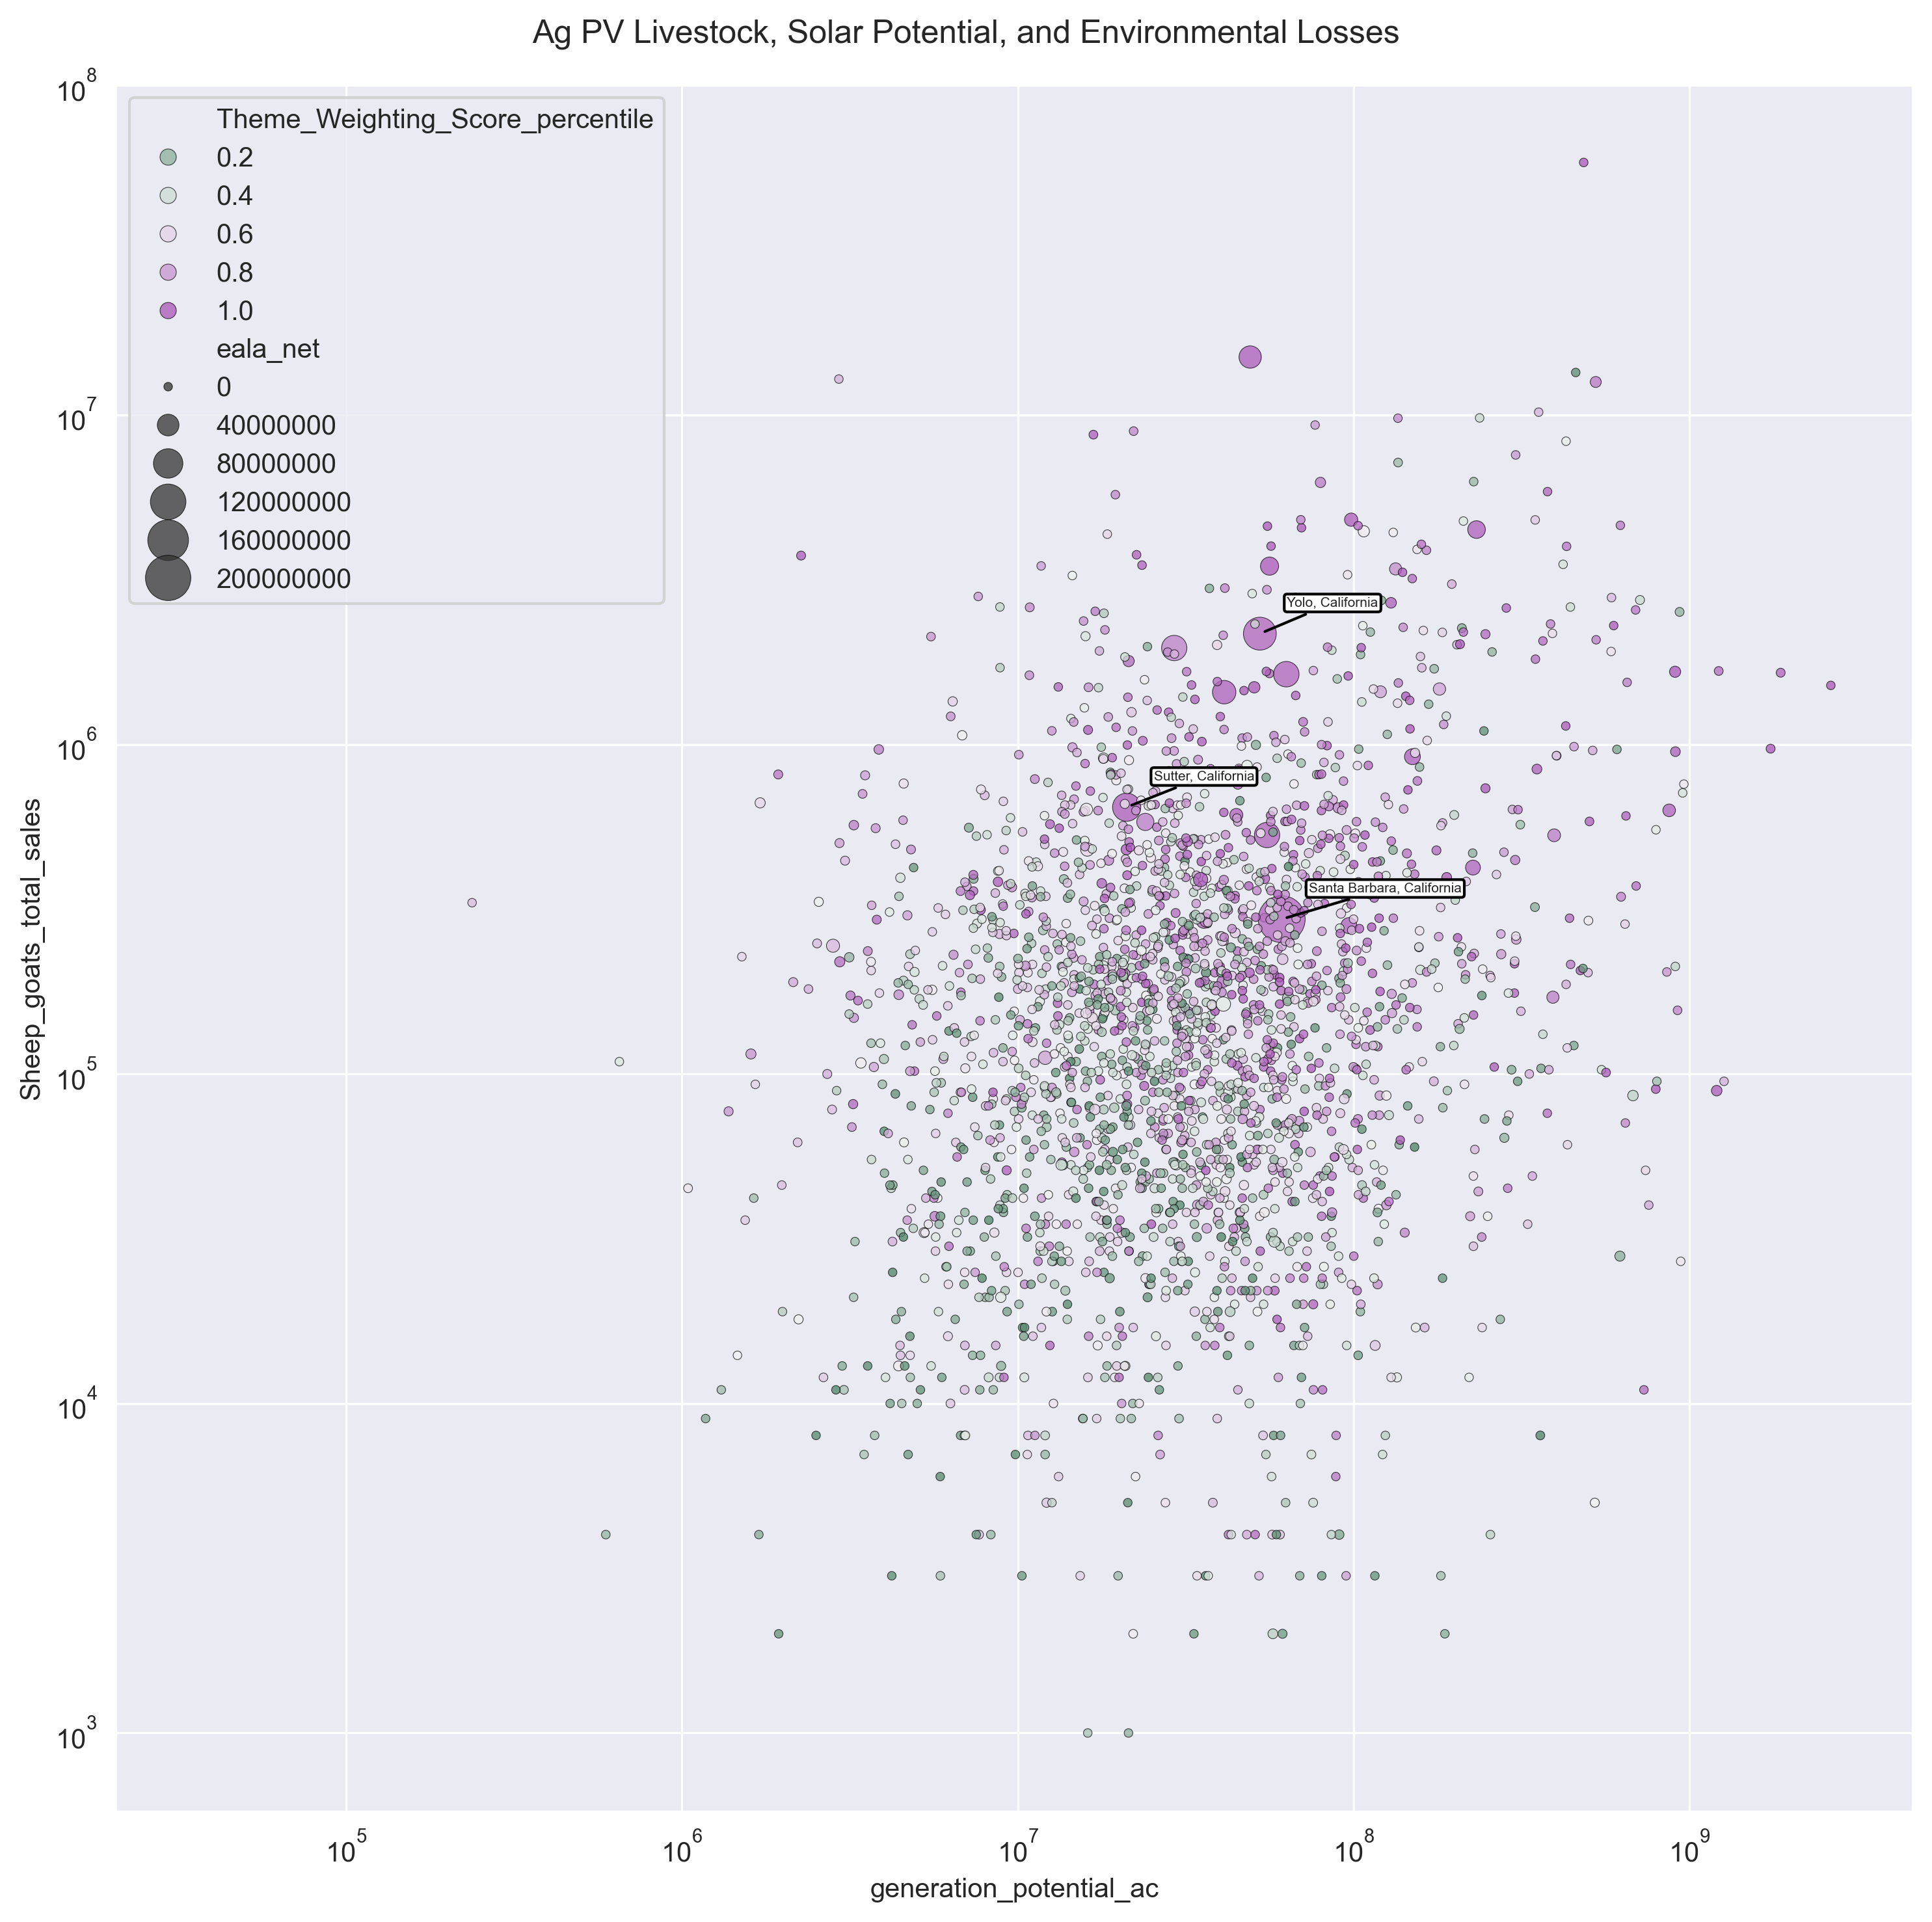

In [7]:
agpviz.calculate_col_percentile('Theme_Weighting_Score')

annot_kwargs={'xytext':(10, 10), 'textcoords':'offset points'}

scatter_params = {'palette': sns.diverging_palette(145, 300, s=60, as_cmap=True),
                 'y': 'Sheep_goats_total_sales',
                  'size':'eala_net',
                  'annot_col': 'eala_net',
                 'hue': 'Theme_Weighting_Score_percentile',
                 'logx': True,
                 'logy': True,
                 'annot_kwargs': annot_kwargs,
                 'top_n': 5}

agpviz.make_scatter_plot('Ag PV Livestock, Solar Potential, and Environmental Losses', **scatter_params)

### Sentiment Analysis Combo
combine euity index with Caspar's sentiment analysis

sentiment data are only at state level, so we need to aggregate euity index data

In [73]:
sentiment_df = pd.read_excel(os.path.join(data_dir, 'Summary_table_states_AgPV.xlsx'))

state_equity_df = agpviz.df.set_index('state').select_dtypes(include=[np.number]).groupby('state').mean().reset_index()
state_equity_df = state_equity_df.rename(columns={'state':'State'})
sentiment_equity_df = state_equity_df.merge(sentiment_df, on='State')
sentiment_equity_df['Net Equity Score'] = (sentiment_equity_df['Theme_Weighting_Score'] - sentiment_equity_df['Theme_Weighting_Score'].mean()) / sentiment_equity_df['Theme_Weighting_Score'].mean()
sentiment_equity_df['Net Equity Score'] = sentiment_equity_df['Net Equity Score'] * 100

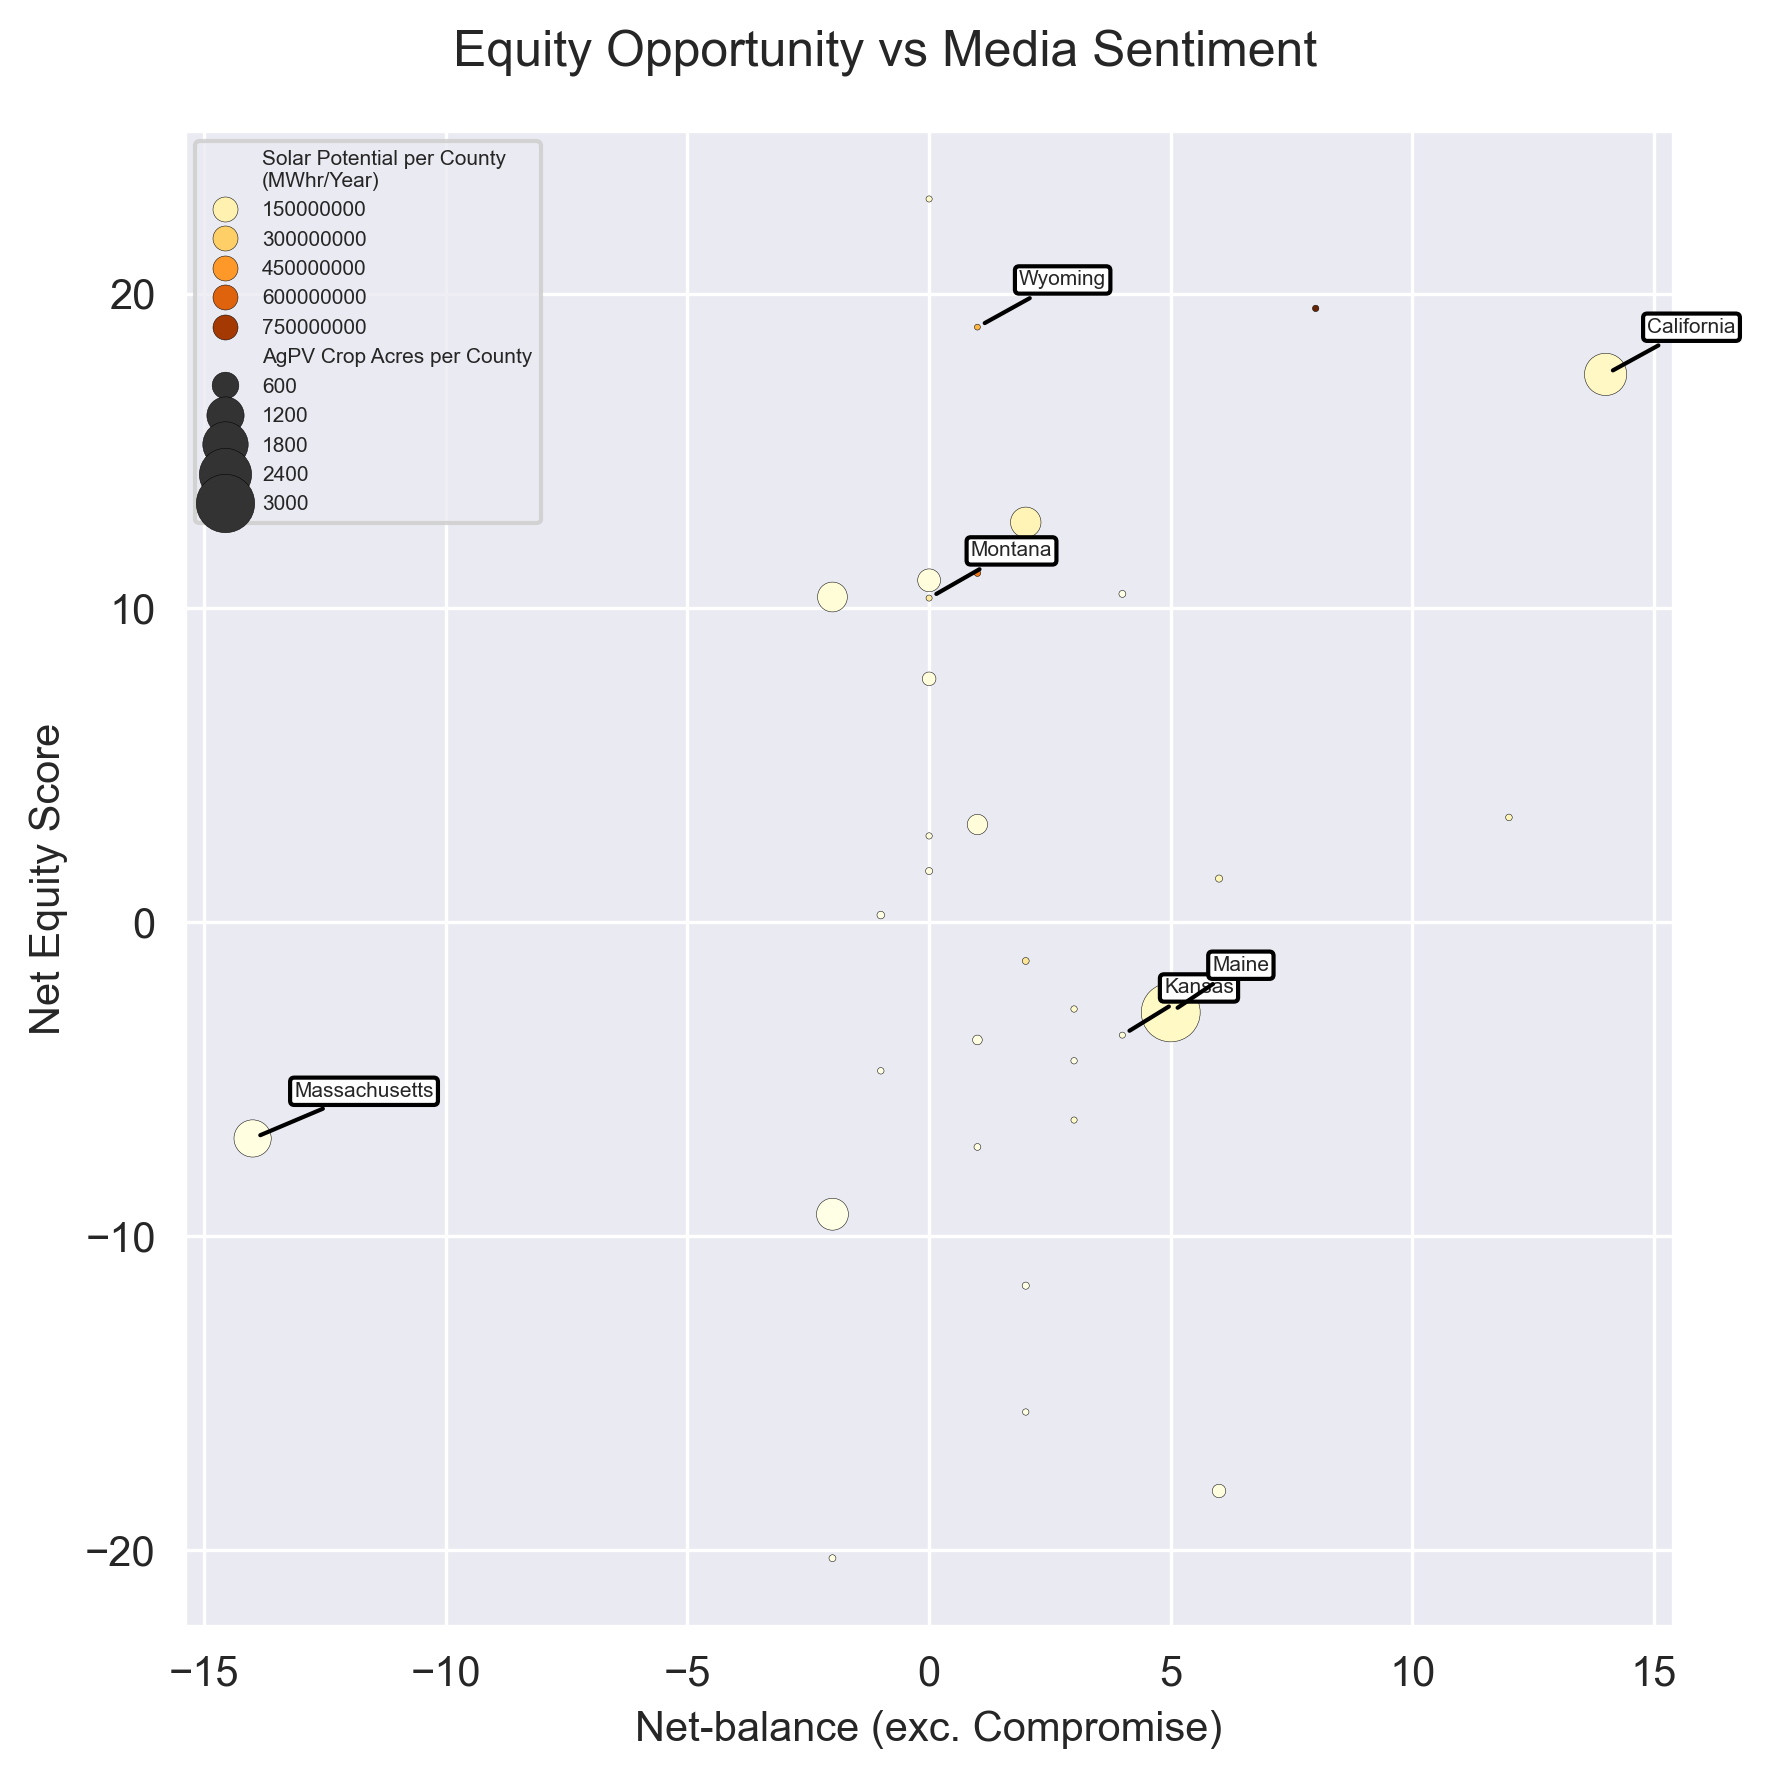

In [78]:
x_sentiment = 'Net-balance (exc. Compromise)'
y_sentiment = 'Net Equity Score'

sentiment_equity_df = sentiment_equity_df.rename(columns={'AgPV_crop_totals':'AgPV Crop Acres per County', 'generation_potential_ac':'Solar Potential per County\n(MWhr/Year)'})

sentiment_palette = sns.color_palette("YlOrBr", as_cmap=True)

fig, ax = plt.subplots(1,1, dpi=300, figsize=(6,6))
ax = sns.scatterplot(sentiment_equity_df, x=x_sentiment, y=y_sentiment, 
                     size='AgPV Crop Acres per County', hue='Solar Potential per County\n(MWhr/Year)',
                    sizes=(2, 200), palette=sentiment_palette, edgecolor='k')

ax.legend(fontsize=5)

n=3
sorted_equity_df = sentiment_equity_df.sort_values('AgPV Crop Acres per County')
top_df = sorted_equity_df.iloc[:n]
bottom_df = sorted_equity_df.iloc[-n:]

params = {'bbox': dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'),
          'size':5,
          'arrowprops':{'arrowstyle':'-', 'color': 'black'},
          'xytext':(10, 10), 
          'textcoords':'offset points'
          
         }

top_df.apply(lambda row: ax.annotate(row['State'], xy=(row[x_sentiment], row[y_sentiment]), **params), axis=1)
bottom_df.apply(lambda row: ax.annotate(row['State'], xy=(row[x_sentiment], row[y_sentiment]), **params), axis=1)

plt.suptitle('Equity Opportunity vs Media Sentiment')
plt.tight_layout()

plt.savefig(os.path.join(graph_dir, 'equity_index_vs_sentiment.png'))

### Pareto Frontier

Find optimum combinations of each objective (underlying index variable)

In [177]:
# using too many of these objects will start to classify nearly everything as optimal
# don't use carbon intesity of electricity.Becuase it's state level, it doesnt have enogh unique values
# need to format avg farm net income so it's actually minimizing it
objective_cols = ['generation_potential_ac', 
                  'eala_net', 
                  'Energy Burden (% income)', 
                  #'Percent Non Investor Owned',
                  'AgPV_crop_totals',
                  'Sheep_goats_total_sales', 
                  #'Percent Woman-owned Sheep Goats Producers',
                  'Percent Nonwhite Sheep Goats Producers', 
                  #'Avg Farm Net Income ($)',
                  #'Percent Woman-owned Cropland',
                   'Percent Non-white Cropland',
                   #'tonne_co2_per_person',
                   'SolarPanelLandUse', 
                   'ag_worker_heat_days'
                 ]

all_vars_df = agpviz.df.copy()
all_vars_df=all_vars_df.dropna(subset=['generation_potential_ac'])
all_vars_df =  all_vars_df[all_vars_df['Ag_compatibility_exists']]
optimization_df = all_vars_df[objective_cols]

pareto = oapackage.ParetoDoubleLong()
dub_v = oapackage.doubleVector

optimization_df.apply(lambda row: pareto.addvalue(dub_v(row), row.name), axis=1)

pareto.show(verbose=1)

optimal_ind = list(pareto.allindices())

all_vars_df['Pareto_optimal'] = all_vars_df.index.isin(optimal_ind)
all_vars_df

Pareto: 399 optimal values, 399 objects


FIPS      county    state  capacity_mw_dc  Solar_supply_per_land_area  \
0     01001     Autauga  Alabama    29947.935193                34181.380730   
1     01003     Baldwin  Alabama    62911.632997                27201.414072   
2     01005     Barbour  Alabama    58081.848135                44683.161784   
3     01007        Bibb  Alabama    38014.050777                40077.253060   
4     01009      Blount  Alabama    24767.738851                24999.826647   
...     ...         ...      ...             ...                         ...   
3069  56037  Sweetwater  Wyoming   537395.558058                38204.581543   
3070  56039       Teton  Wyoming     6586.986832                 1031.332554   
3071  56041       Uinta  Wyoming   112314.202527                39384.990608   
3072  56043    Washakie  Wyoming    96852.034274                30287.730845   
3073  56045      Weston  Wyoming   207759.812413                60781.432740   

      generation_potential_ac  generation_potential_dc    ALAND_SQKM  \
0                5.262676e+07             5.262677e+07   1539.632505   
1                1.120095e+08             1.120096e+08   4117.783661   
2                1.024210e+08             1.024211e+08   2292.161870   
3                6.461219e+07             6.461220e+07   1612.191075   
4                4.175624e+07             4.175625e+07   1670.261241   
...                       ...                      ...           ...   
3069             1.031744e+09             1.031745e+09  27005.776520   
3070             1.067614e+07             1.067614e+07  10351.791172   
3071             2.123501e+08             2.123501e+08   5391.649523   
3072             1.756130e+08             1.756130e+08   5798.156223   
3073             3.775019e+08             3.775019e+08   6210.808970   

      RESL_SCORE  SOVI_SCORE  ...  SolarPanelLandUse  ag_worker_heat_days  \
0      51.810001   51.299999  ...               0.05                483.0   
1      86.120003   31.030001  ...               0.05               7689.5   
2       6.240000   99.269997  ...               0.05                749.0   
3      19.730000   80.779999  ...               0.05                  0.0   
4      22.820000   51.369999  ...               0.05                360.0   
...          ...         ...  ...                ...                  ...   
3069   30.709999   37.400002  ...               0.30                  6.0   
3070   39.529999   19.190001  ...               0.05                  0.0   
3071   27.820000   40.639999  ...               0.05                  0.0   
3072   62.029999   26.610001  ...               0.05                903.0   
3073    9.740000   23.200001  ...               0.05                288.0   

      Ag_compatibility_exists  eala_sum_positive       eala_net  \
0                        True       21551.518712   20828.748821   
1                        True      444297.843564  443676.897072   
2                        True      197370.186504  196296.181220   
3                        True        5076.115567    4751.245599   
4                        True       32552.242402   10964.282012   
...                       ...                ...            ...   
3069                     True        3490.145833    3454.037437   
3070                     True        1808.294899    1504.537027   
3071                     True        2603.783343    2538.875689   
3072                     True       14364.697814   13932.467121   
3073                     True         938.089248    -530.078908   

      EW_AgPV_cobenefits_score  Theme_Weighting_Score        County, State  \
0                     0.776109               0.752235     Autauga, Alabama   
1                     0.720412               0.798956     Baldwin, Alabama   
2                     0.805832               0.778837     Barbour, Alabama   
3                     0.527113               0.564041        Bibb, Alabama   
4                     0.525702               0.542273      Bl

<Figure size 2400x2400 with 0 Axes>

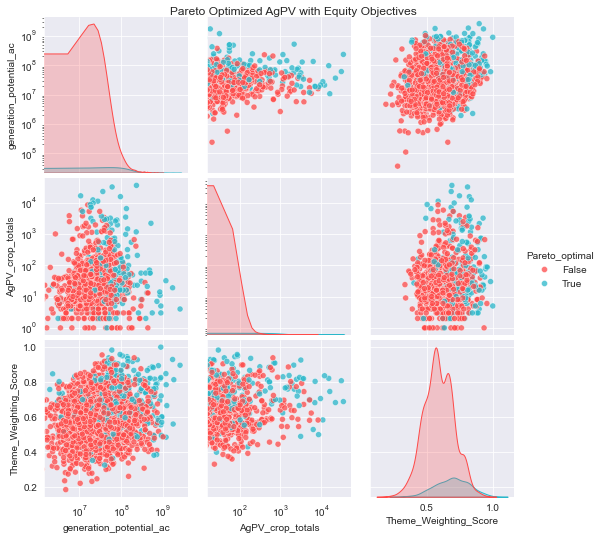

In [178]:
plt.figure(dpi=300, figsize=(8,8))

colors = ['#FE4A49', '#2AB7CA']

pp = sns.pairplot(all_vars_df[['generation_potential_ac', 'AgPV_crop_totals', 'Theme_Weighting_Score', 'Pareto_optimal']],
                  hue='Pareto_optimal',
                 palette=colors,
                 plot_kws={'alpha':0.75})

log_cols = ['generation_potential_ac', 'AgPV_crop_totals']


for ax in pp.axes.flat:
    if ax.get_xlabel() in log_cols:
        ax.set(xscale='log')
        
    if ax.get_ylabel() in log_cols:
        ax.set(yscale='log')
        

plt.suptitle('Pareto Optimized AgPV with Equity Objectives')
#sns.move_legend(pp, "center right", bbox_to_anchor=(1, 1))

#plt.tight_layout()

plt.savefig(os.path.join(graph_dir, 'pareto_pairplot.png'))  

Do the equity scores between pareto optimal counties and non-optimal counties differ?

In [180]:
import scipy.stats as stats

a = all_vars_df.loc[all_vars_df['Pareto_optimal'], 'Theme_Weighting_Score']
b = all_vars_df.loc[~all_vars_df['Pareto_optimal'], 'Theme_Weighting_Score']

f, p = stats.ttest_ind(a, b)

if p < 0.05:
    print(f'Significant Difference! p=={p}')
else:
    print('Sad. No difference. You have failed.')
    
# Yes they do!
print(f'Optimal {a.mean():.3f}')
print(f'Non-optimal {b.mean():.3f}')

Significant Difference! p==3.6768927889995777e-57
Optimal 0.690
Non-optimal 0.589
